# Data exploration - light pollution classification
3600 images (80-10-10 train/val/test split)

As it can be seen below, the class distribution is even.

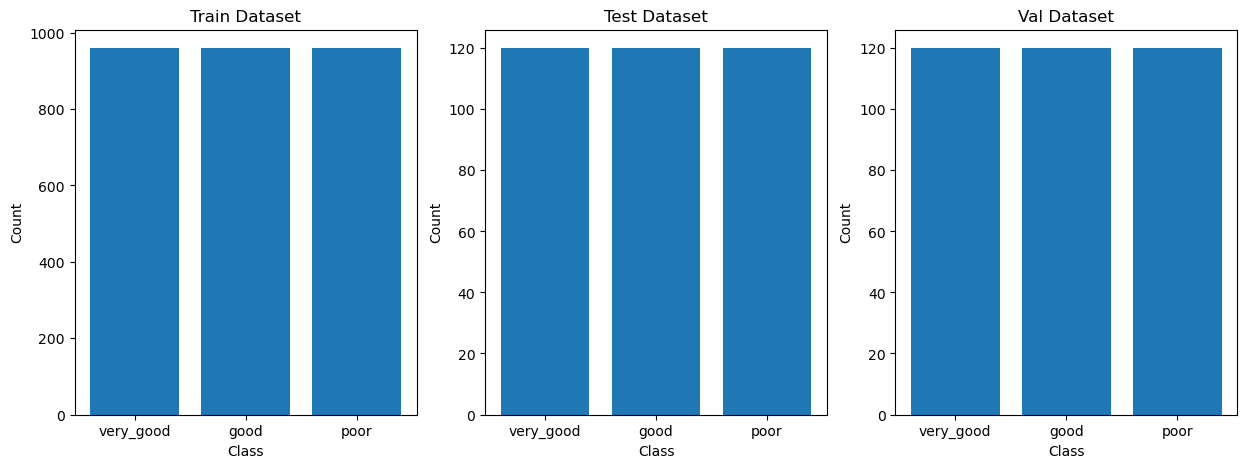

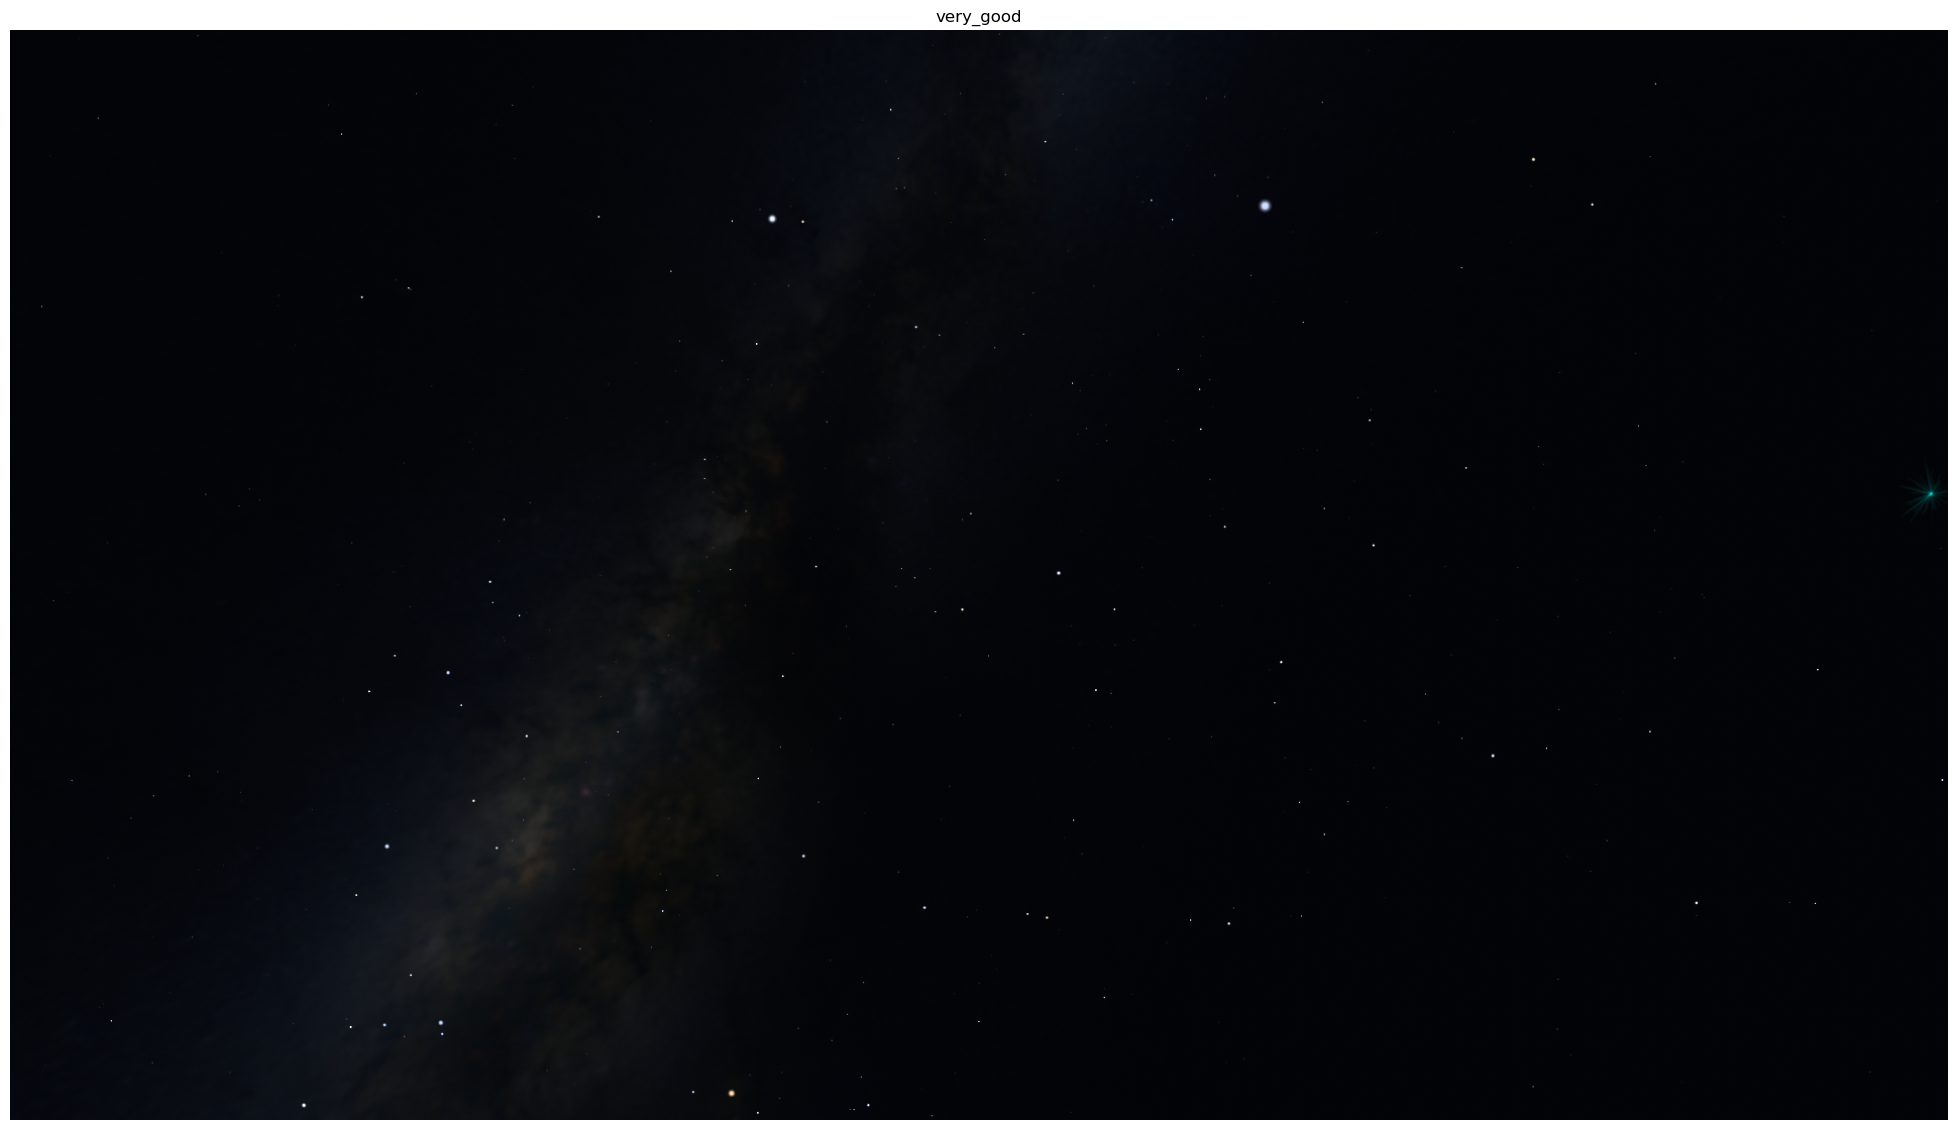

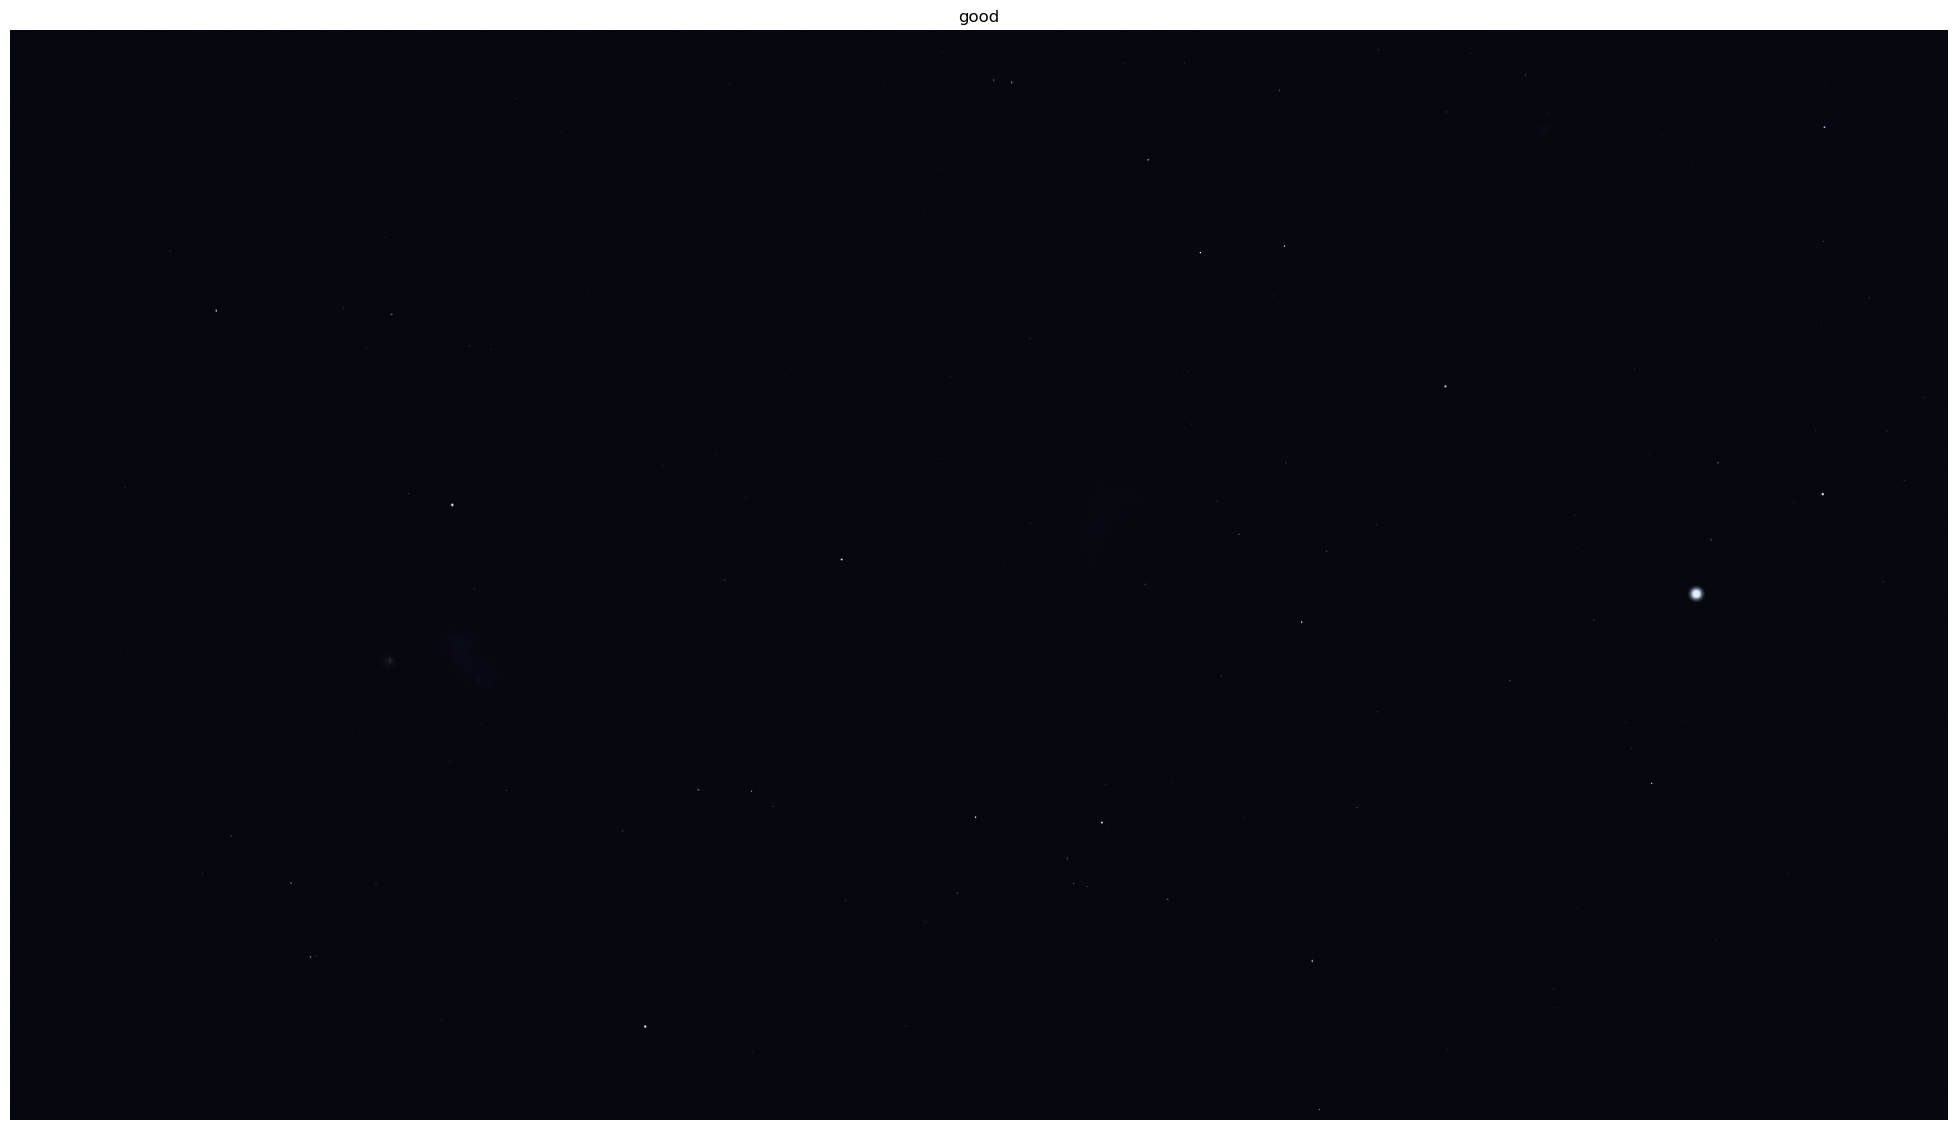

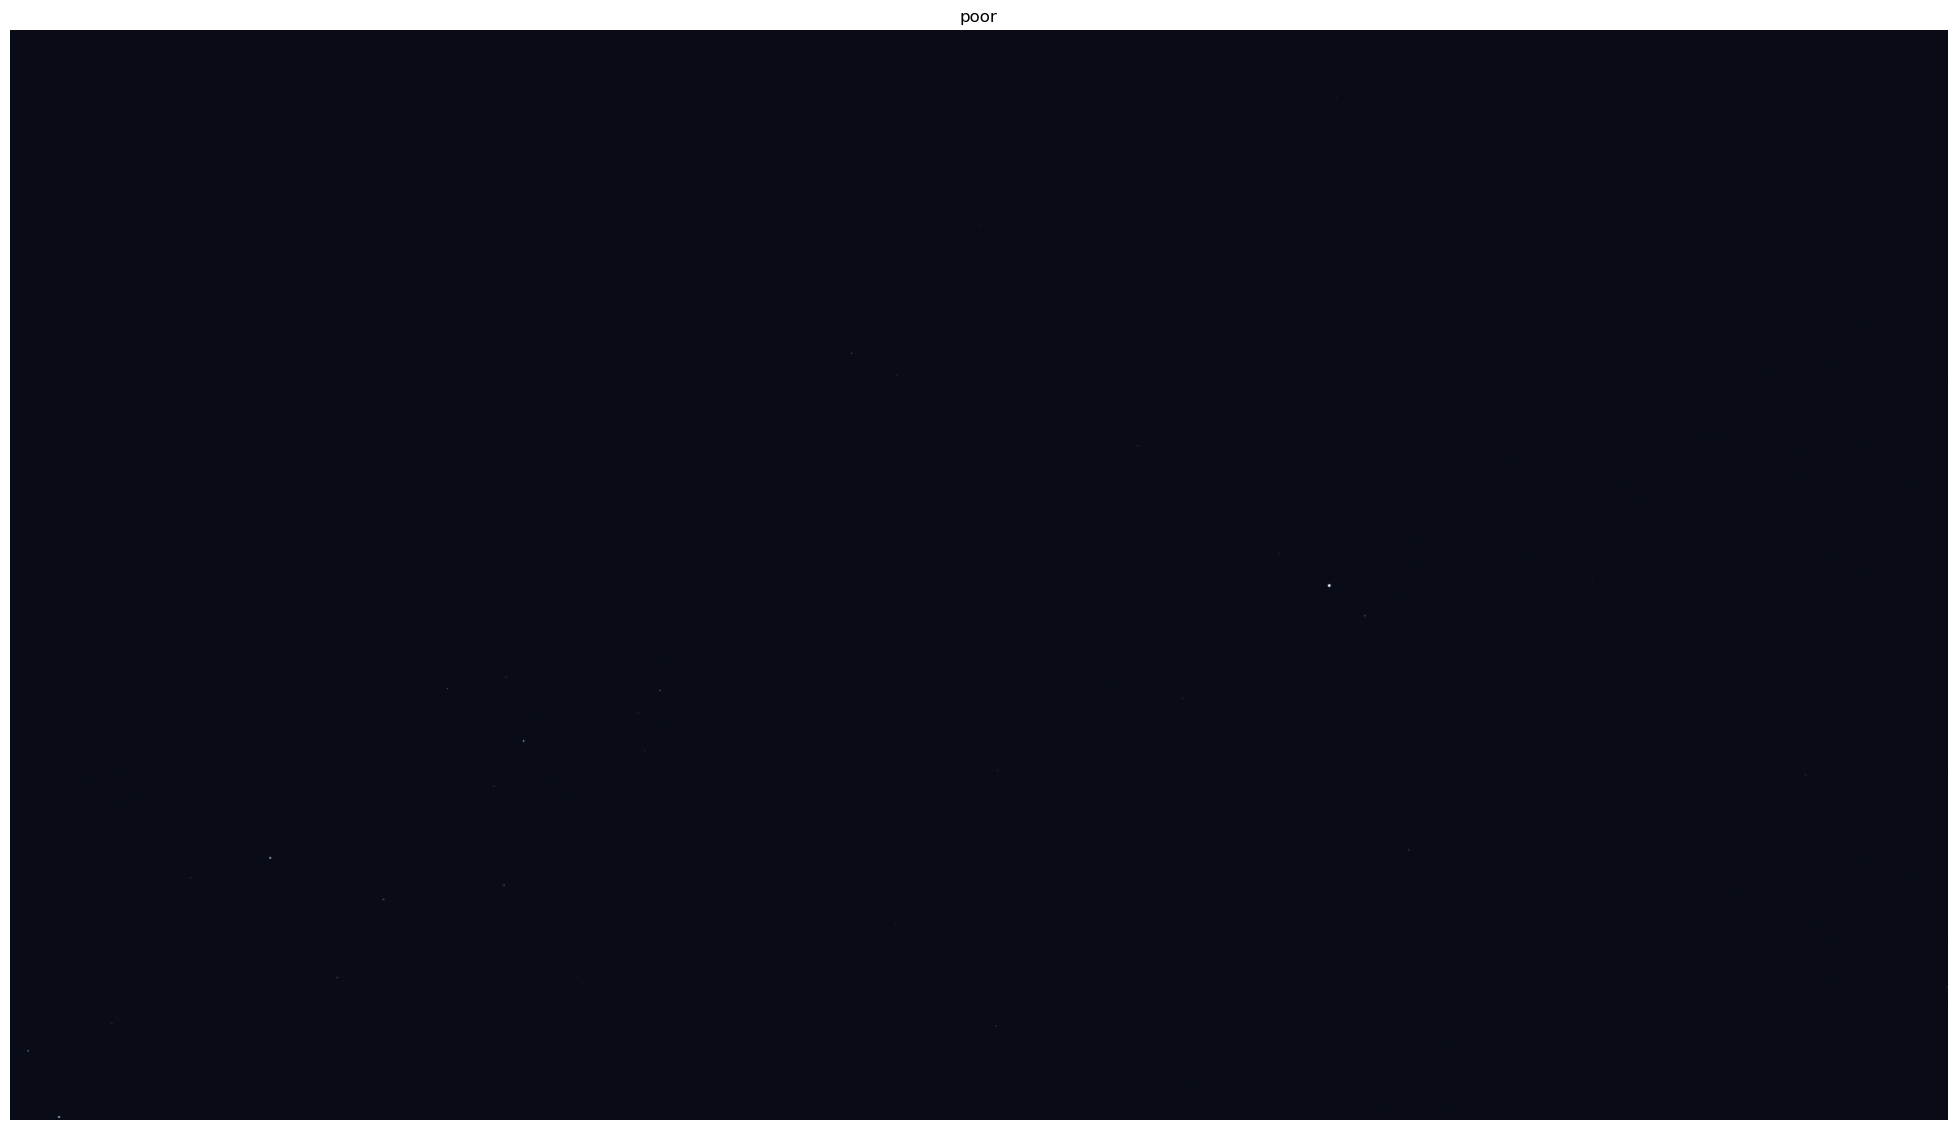

In [6]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# data folder
data_dir = '/kaggle/input/clasificare2/clasificare2'
train_dir = os.path.join(data_dir, 'train')
test_dir = os.path.join(data_dir, 'test')
val_dir = os.path.join(data_dir, 'val')
classes = os.listdir(train_dir)

class_counts = {}
for c in classes:
    train_path = os.path.join(train_dir, c)
    test_path = os.path.join(test_dir, c)
    val_path = os.path.join(val_dir, c)
    count_train = len(os.listdir(train_path))
    count_test = len(os.listdir(test_path))
    count_val = len(os.listdir(val_path))
    class_counts[c] = {'train': count_train, 'test': count_test, 'val': count_val}

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, dataset in enumerate(['train', 'test', 'val']):
    counts = [class_counts[c][dataset] for c in classes]
    ax[i].bar(classes, counts)
    ax[i].set_title(dataset.capitalize() + ' Dataset')
    ax[i].set_xlabel('Class')
    ax[i].set_ylabel('Count')
plt.show()

for dataset in ['train']:
    for i, c in enumerate(classes):
        path = os.path.join(data_dir, dataset, c)
        img_files = os.listdir(path)[:1]  
        for j, img_file in enumerate(img_files):
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert from BGR to RGB
            plt.figure(figsize=(25, 25))
            plt.imshow(img)
            plt.title(c)
            plt.axis('off')
            plt.show()


# Plotting the mean intensity value of pixels by class
* by Bortle class

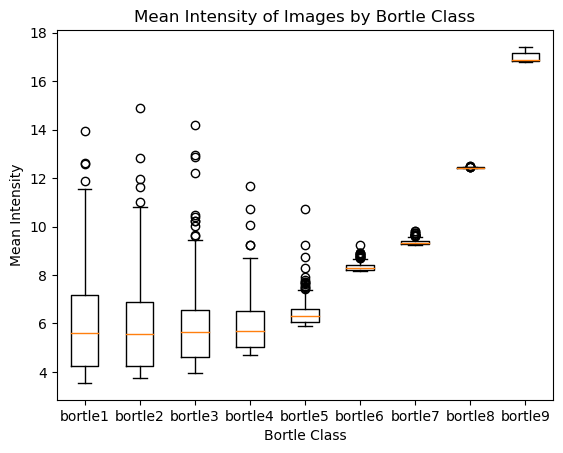

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def mean_intensity(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.mean(gray_image)

base_folder = '/kaggle/input/bortle-small-dataset/clasificare/train'
bortle_folders = [f'bortle{i}' for i in range(1, 10)]

mean_intensities = []

for bortle_folder in bortle_folders:
    folder_mean_intensities = []
    image_folder = os.path.join(base_folder, bortle_folder)
    
    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        mean_int = mean_intensity(image)
        folder_mean_intensities.append(mean_int)
    
    mean_intensities.append(folder_mean_intensities)

fig, ax = plt.subplots()
ax.boxplot(mean_intensities)
ax.set_xticklabels(bortle_folders)
plt.xlabel('Bortle Class')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity of Images by Bortle Class')
plt.show()


* by the three resulting classes (very_good, good, poor)

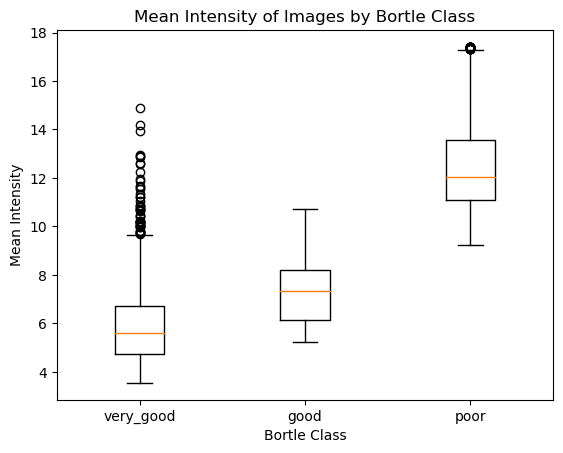

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

def mean_intensity(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return np.mean(gray_image)

base_folder = '/kaggle/input/clasificare2/clasificare2/train'
bortle_folders = ['very_good', 'good', 'poor']

mean_intensities = []

for bortle_folder in bortle_folders:
    folder_mean_intensities = []
    image_folder = os.path.join(base_folder, bortle_folder)
    
    for image_name in os.listdir(image_folder):
        image_path = os.path.join(image_folder, image_name)
        image = cv2.imread(image_path)
        mean_int = mean_intensity(image)
        folder_mean_intensities.append(mean_int)
    
    mean_intensities.append(folder_mean_intensities)

fig, ax = plt.subplots()
ax.boxplot(mean_intensities)
ax.set_xticklabels(bortle_folders)
plt.xlabel('Bortle Class')
plt.ylabel('Mean Intensity')
plt.title('Mean Intensity of Images by Bortle Class')
plt.show()